National Average Violent Crime 18807.0
State  Crimes   Distance from Mean
ALABAMA    15350  -3457.0
ALASKA    4697  -14110.0
ARIZONA    23856  5049.0
ARKANSAS    12048  -6759.0
CALIFORNIA    145205  126398.0
COLORADO    15533  -3274.0
CONNECTICUT    7754  -11053.0
DELAWARE    2359  -16448.0
DISTRICT OF COLUMBIA    7711  -11096.0
FLORIDA    50540  31733.0
GEORGIA    18496  -311.0
HAWAII    3331  -15476.0
IDAHO    2676  -16131.0
ILLINOIS    50968  32161.0
INDIANA    21325  2518.0
IOWA    7533  -11274.0
KANSAS    7982  -10825.0
KENTUCKY    8342  -10465.0
LOUISIANA    16444  -2363.0
MAINE    1254  -17553.0
MARYLAND    14175  -4632.0
MASSACHUSETTS    24155  5348.0
MICHIGAN    35790  16983.0
MINNESOTA    11618  -7189.0
MISSISSIPPI    3256  -15551.0
MISSOURI    25175  6368.0
MONTANA    1952  -16855.0
NEBRASKA    4401  -14406.0
NEVADA    18823  16.0
NEW HAMPSHIRE    2413  -16394.0
NEW JERSEY    19098  291.0
NEW MEXICO    9480  -9327.0
NEW YORK    66581  47774.0
NORTH CAROLINA    16846  -1961.0

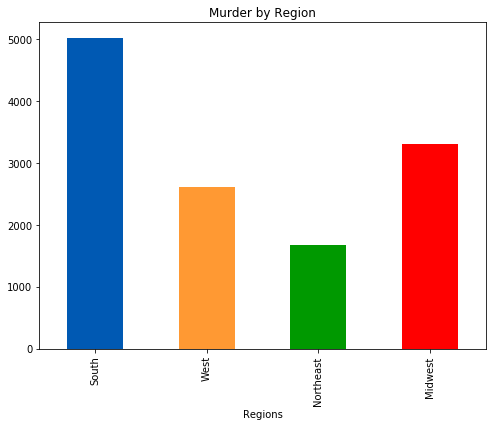

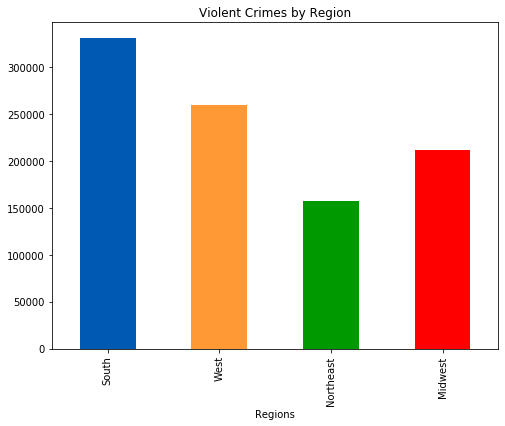

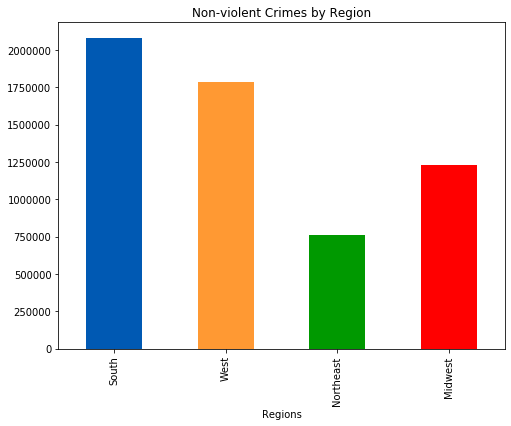

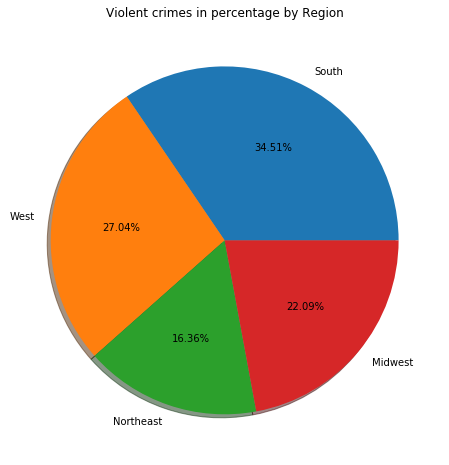

In [1]:
import json
import pandas as pd

with open("FBI_CrimeData_2016.json") as json_file:
    crime_list = json.load(json_file)
    def accum_crime(key,crime,crime_list):
        murder_by_region ={}
        
        for crime_dict in crime_list:
            if crime_dict[key] in murder_by_region:
                Region = crime_dict[key]
                murders = int(crime_dict[crime])
                murder_by_region[Region]= murders + int(murder_by_region[Region])
            else:
                Region = crime_dict[key]
                murders = int(crime_dict[crime])
                murder_by_region[Region] = murders
        return murder_by_region
    
    murder_by_region= accum_crime('Region','Murder',crime_list)
    
    def barchart(murder_by_region,title):
    
        dataSeriesY = pd.Series(list(murder_by_region.values()))
        dataSeriesX = pd.Series(list(murder_by_region.keys()))
        pdDict = {"Incidents":dataSeriesY, "Regions":dataSeriesX}
        df = pd.DataFrame(pdDict)
        print('\n')
        print(title)
        print(df)
        df.plot.bar(x="Regions", y="Incidents", title= title,figsize=(8,6),legend=False,
                color=['#0059b3', '#ff9933', '#009900', '#ff0000'])
    
    


    def accum_violent_crime(key,crime,crime_list):
        
        violent_by_region ={}
        for crime_dict in crime_list:
            if crime_dict[key] in violent_by_region:
                Region = crime_dict[key]
                violent_crimes = int(crime_dict[crime[0]])+int(crime_dict[crime[1]])+int(crime_dict[crime[2]])+int(crime_dict[crime[3]])
                violent_by_region[Region]= violent_crimes + int(violent_by_region[Region])
            else:
                Region = crime_dict[key]
                violent_crimes = int(crime_dict[crime[0]])+int(crime_dict[crime[1]])+int(crime_dict[crime[2]])+int(crime_dict[crime[3]])
                violent_by_region[Region] = violent_crimes
        return violent_by_region
    
    crimes = ['Murder','Rape','Robbery','Assault']
    violent_by_region = accum_violent_crime('Region',crimes,crime_list)
    violent_by_state = accum_violent_crime('State',crimes,crime_list)
    TotalCrime = 0 
    Violentstate=[]
    for crime in violent_by_state.values():
        TotalCrime += crime
    
    Average = TotalCrime/len(violent_by_state.keys())


    for crime in violent_by_state.items():
        Distance = crime[1] - Average

        violentByState = (crime[0],crime[1],Distance)
        Violentstate.append(violentByState)
    
    print("National Average Violent Crime", Average)
    print("{}  {}   {}".format('State','Crimes','Distance from Mean'))
    for state_tuple in Violentstate:
        print("{0}    {1}  {2}".format(state_tuple[0], state_tuple[1], state_tuple[2]))
    
    def piechart(violent_by_region,title):
        dataSeries = pd.Series(list(violent_by_region.values()),index=list(violent_by_region.keys()))
        pdDict = { "Quarter": dataSeries}
        df = pd.DataFrame(pdDict)
        df.plot.pie(y='Quarter',label="",title="Violent crimes in percentage by Region",legend=False,figsize=(8,8),autopct='%1.2f%%',shadow=True)


        

    
    def accum_nonviolent_crime(key, crime,crime_list):
        nonviolent_by_region ={}
        for crime_dict in crime_list:
            if crime_dict[key] in nonviolent_by_region:
                Region = crime_dict[key]
                nonviolent_crimes = int(crime_dict[crime[0]])+int(crime_dict[crime[1]])+int(crime_dict[crime[2]])
                nonviolent_by_region[Region]= nonviolent_crimes + int(nonviolent_by_region[Region])
            else:
                Region = crime_dict[key]
                nonviolent_crimes = int(crime_dict[crime[0]])+int(crime_dict[crime[1]])+int(crime_dict[crime[2]])
                nonviolent_by_region[Region] = nonviolent_crimes
        return nonviolent_by_region
    non_violent_crimes = ['Burglary','Theft','Vehicle_Theft']
    nonviolent_by_region = accum_nonviolent_crime('Region', non_violent_crimes,crime_list)
    
    
    
    #Prints Dicts
    print(murder_by_region)
    print(violent_by_region)
    print(nonviolent_by_region)
    
    
    #Charts
    barchart(murder_by_region,'Murder by Region')
    barchart(violent_by_region,'Violent Crimes by Region')
    barchart(nonviolent_by_region,'Non-violent Crimes by Region')
    
    #Piechart
    piechart(violent_by_region,'Violent Crimes by Region')
    
    #top ten cities by violent crime
    CrimebyCity = accum_violent_crime('City',crimes,crime_list)
    sort_city = sorted(CrimebyCity.items(), key=lambda x: x[1], reverse=True)
    top_ten= list(sort_city)[:10]
    print("\n", "Top 10 cities by most Violent Crimes")
    print("{}  {} {} ".format("Number",'City','Crimes'))
    for cityIndex in range(len(top_ten)):
        print("{0}   {1}   {2} ".format(cityIndex + 1, top_ten[cityIndex][0], top_ten[cityIndex][1]))
    

    
    
              
    


                
                
            
        
    
            
        
    
    
